<a href="https://colab.research.google.com/github/fabiomonte2/Implementa-o-ml/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessarias

In [52]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

importando a base de dados "train.csv"


In [53]:
data = pd.read_csv('train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Aplicando o Método XGboost

In [54]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import DMatrix

Separar a variável de destino e o resto das variáveis ​​usando o .ilocsubconjunto dos dados.

In [55]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

Selecionando 4 atributos para testar

In [43]:
data[['Outlet_Establishment_Year','Item_MRP','Item_Visibility','Item_Outlet_Sales',]][:5]

,Outlet_Establishment_Year,Item_MRP,Item_Visibility,Item_Outlet_Sales
0,1999,249.8092,0.016047,3735.1380
1,2009,48.2692,0.019278,443.4228
2,1999,141.6180,0.016760,2097.2700
3,1998,182.0950,0.000000,732.3800
4,1987,53.8614,0.000000,994.7052


In [56]:
X = data[['Outlet_Establishment_Year','Item_MRP','Item_Visibility','Item_Outlet_Sales',]]

Agora você converterá o conjunto de dados em uma estrutura de dados otimizada chamada Dmatrixque o XGBoost suporta e oferece ganhos de desempenho e eficiência aclamados.

In [57]:
data_dmatrix = xgb.DMatrix(data=X,label=y)


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, data.Item_Outlet_Sales, test_size=0.3)

In [59]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [60]:
x_train.shape, y_train.shape

((5966, 4), (5966,))

In [61]:
x_test.shape, y_test.shape

((2557, 4), (2557,))

In [62]:
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

[23:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 1593.650840


In [64]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2494.605550,19.484063,2494.309896,38.526025
1,2336.222005,16.584310,2336.224366,42.605143
2,2200.586995,14.809970,2201.407796,45.315615
3,2072.719035,27.843390,2073.853760,32.193676
4,1937.091187,41.495264,1940.431722,72.706038


In [66]:
print((cv_results["test-rmse-mean"]).tail(1))


49    566.347392
Name: test-rmse-mean, dtype: float64


In [67]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[23:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


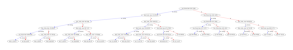

In [68]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

Importância de cada atributo estudado 

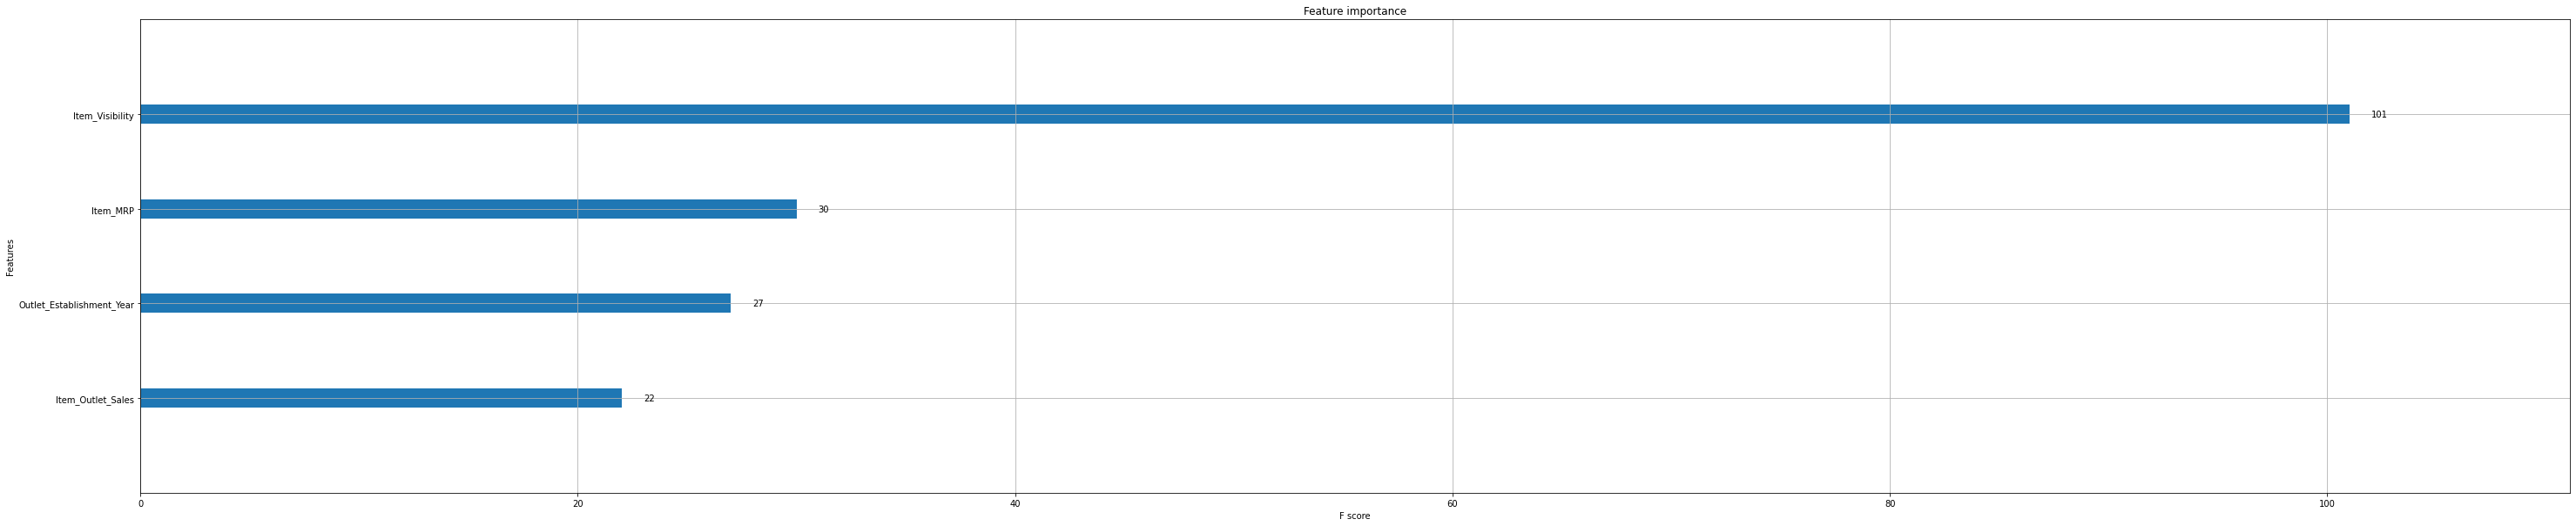

In [69]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()